## <b>AML 3104 Project:</b>
## <b>Model to Predict Client Subscription to Term Deposit</b>

<b>Problem Statement:</b>
- A bank needs to identify customers who are likely to subscribe to Term Deposit. This will help the bank improve its strategies and optimize marketing campaigns by targeting the right customers.

<b>Objectives:</b>
- Identify factors affecting propensity to subscribe to Term Deposit
- Build a predictive model to identify and segment customers based on their likelihood to get the product
- Deploy the application on a cloud platform so that it is accessible to users

<b>Summary:</b>
- The project evaluates and optimizes a marketing campaign dataset to predict customer subscription to a product which is Term Deposit. The dataset includes various features such as age, job type, marital status, education level, and financial information with the target variable being whether a customer subscribed ('yes') or not ('no'). The project uses feature engineering to enhance predictive capabilities of machine learning models. Two models are employed: Decision Tree classifier and Artificial Neural Network (ANN). Both the Decision Tree  and ANN models are evaluated for accuracy, precision, recall, and F1 score.
- The project concludes with a comparative analysis of the Decision Tree and ANN models, emphasizing their strengths and weaknesses in predicting customer subscriptions. The performance of the ANN and decision tree models is nearly identical. But since the decision tree is easier to understand and more straightforward, this will be the final model. This comprehensive approach ensures a thorough understanding of the marketing campaign's effectiveness and facilitates data-driven decision-making for future campaigns.


<b>App Link:</b>
- https://bankmarketingcampaign-prod.nn.r.appspot.com/

<b>GitHub Link: </b>
- https://github.com/JoviLambton/AML-3104-Project.git

<b>Task Distribution:</b>
- Data Cleaning - Luz Zapanta (C0879190)
- Data Exploration, Feature Engineering - Keyvan Amini (C0866360)
- Data Modeling Using Decision Tree - Jovi Fez Bartolata (C0869701)
- Data Modeling Using Decision ANN - Maricris Resma (C0872252)
- UI and Cloud Deployment - Jefford Secondes (C0865112)

In [101]:
# Load libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import tensorflow as tf
import keras as ks
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import os

# Get parent directory
parent_directory = os.path.abspath(os.curdir).rsplit('\\', 1)[0]
# print('Parent Directory:',parent_directory)

----
### <b>Dataset Selection</b>

The raw data has 17 variables.

Bank client data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
- 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- 4 - education (categorical: "unknown","secondary","primary","tertiary")
- 5 - default: has credit in default? (binary: "yes","no")
- 6 - balance: average yearly balance, in euros (numeric) 
- 7 - housing: has housing loan? (binary: "yes","no")
- 8 - loan: has personal loan? (binary: "yes","no")
<br>

Related with the last contact of the current campaign:
- 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
- 10 - day: last contact day of the month (numeric)
- 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- 12 - duration: last contact duration, in seconds (numeric)
<br>

Other attributes:
- 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- 15 - previous: number of contacts performed before this campaign and for this client (numeric)
- 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
<br>

Output variable (desired target):
- 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Source: Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

In [33]:
# Import data
df = pd.read_csv(parent_directory + "\\dataset\\bank-full.csv",sep=";",encoding="utf-8")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [34]:
# Drop fields related to the current campaign because we won't have these data when predict next time.
# For example, the data on call duration is only available once the campaign is live/on-going.

df = df.drop(['day','duration','campaign'], axis=1)
df.shape

(45211, 14)

In [35]:
# Show column names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   month      45211 non-null  object
 10  pdays      45211 non-null  int64 
 11  previous   45211 non-null  int64 
 12  poutcome   45211 non-null  object
 13  y          45211 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.8+ MB


Observation: The data has 45,211 records. There are 10 categorical data, including the target variable, and 4 numerical data.

In [36]:
# Rename specific columns
df = df.rename(columns={'y':'subscribed'})

# Show the updated DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   month       45211 non-null  object
 10  pdays       45211 non-null  int64 
 11  previous    45211 non-null  int64 
 12  poutcome    45211 non-null  object
 13  subscribed  45211 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.8+ MB


In [37]:
# Describe data, show statistics
df.describe()

,age,balance,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,40.197828,0.580323
std,10.618762,3044.765829,100.128746,2.303441
min,18.000000,-8019.000000,-1.000000,0.000000
25%,33.000000,72.000000,-1.000000,0.000000
50%,39.000000,448.000000,-1.000000,0.000000
75%,48.000000,1428.000000,-1.000000,0.000000
max,95.000000,102127.000000,871.000000,275.000000


Observation: Some data, such as balance, have a wide range of values (min/max).

----
### <b>Data Cleaning, Data Exploration</b>
- Addressing missing values, handling outliers, and ensuring that the dataset is ready for exploration.
- Utilizing statistical and visual methods to understand the data. Plotting distributions, correlations, and identify patterns.


In [39]:
# Get values of the target variable
print('Original Values:')
print(df['subscribed'].value_counts())

# Transform target variable "Subscribed" to 1/0 value (Subscribed to time deposit: 1, Did not subscribe to time deposit: 0)
df['subscribed'] = df['subscribed'].replace({'yes': 1, 'no': 0})

print('\nTransformed Values:')
print(df['subscribed'].value_counts())

print('\nDistribution:')
print(df['subscribed'].value_counts() / df.shape[0])

Original Values:
0    39922
1     5289
Name: subscribed, dtype: int64

Transformed Values:
0    39922
1     5289
Name: subscribed, dtype: int64

Distribution:
0    0.883015
1    0.116985
Name: subscribed, dtype: float64


Observation: Only 11.7% of the records subscribed to term deposit, therefore, we have an imbalanced class.

In [40]:
# Check null values
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
month         0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Observation: There are no null/missing values.

In [41]:
# Identify categorical and numerical data

# Initiate empty lists
categorical_data = []
numerical_data = []

for i in df.columns:
    # If categorical, append to the list of categorical data
    if df[i].dtype == 'object':
        categorical_data.append(i)
    # Else, append to the list of numerical data
    else:
        numerical_data.append(i)

print(f"Categorical Data : {categorical_data}")
print(f"Numerical Data: {numerical_data}")

Categorical Data : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical Data: ['age', 'balance', 'pdays', 'previous', 'subscribed']


In [42]:
# Create a summary of column attributes

# Initiate empty lists
count_unique_val = []
count_unknown = []
percent_unknown = []

for column in df:
    # Count unique values for each column
    cnt_unique_val = len(df[column].unique())
    count_unique_val.append(cnt_unique_val)
 
    # Count 'unknown' values for each categorical column
    if column in categorical_data:
        cnt_unknown = len(df[df[column].str.upper()=='UNKNOWN'])
        pcnt_unknown = str(round((cnt_unknown / len(df[column])) * 100, 1)) + '%'
    else:
        cnt_unknown = None
        pcnt_unknown = None        
    count_unknown.append(cnt_unknown)
    percent_unknown.append(pcnt_unknown)

# Count null values for each column    
count_null = df.isnull().sum()

# Count NaN values for each column    
count_nan = df.isna().sum()

# Summarize column attributes using a dataframe
df_summary = pd.DataFrame()
df_summary['column_name'] = []
df_summary['data_type'] = df.dtypes
df_summary['column_name'] = df_summary.index

# Add details
df_summary['count_unique_val'] = count_unique_val
df_summary['count_unknown'] = count_unknown
df_summary['percent_unknown'] = percent_unknown
df_summary['count_null'] = count_null
df_summary['count_nan'] = count_nan

# print(df_summary[df_summary.data_type == 'object'])
# print(df_summary[df_summary.data_type != 'object'])
df_summary

,column_name,data_type,count_unique_val,count_unknown,percent_unknown,count_null,count_nan
age,age,int64,77,NaN,None,0,0
job,job,object,12,288.0,0.6%,0,0
marital,marital,object,3,0.0,0.0%,0,0
education,education,object,4,1857.0,4.1%,0,0
default,default,object,2,0.0,0.0%,0,0
balance,balance,int64,7168,NaN,None,0,0
housing,housing,object,2,0.0,0.0%,0,0
loan,loan,object,2,0.0,0.0%,0,0
contact,contact,object,3,13020.0,28.8%,0,0
month,month,object,12,0.0,0.0%,0,0


Observation: Some features have "unknown" values with POUTCOME having the highest percentage at 81.7%.

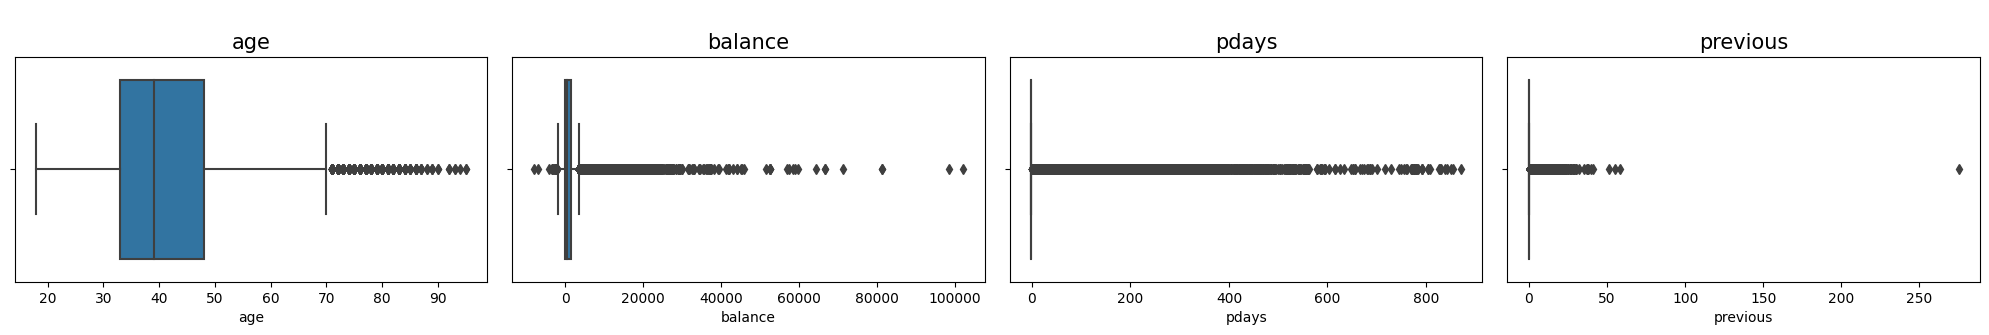

In [52]:
# Display the boxplot of numerical columns

plt.figure(figsize = (20, 20))
plotnumber = 1

for column in numerical_data:
    if column != 'subscribed':
        x = df[column]
        ax = plt.subplot(7, 4, plotnumber)
        sns.boxplot(x = x)
        plt.title(f"\n{df[column].name}", fontsize = 15)
        plotnumber += 1
plt.tight_layout()
plt.show()

Observation: It seems that outliers are present in the data.

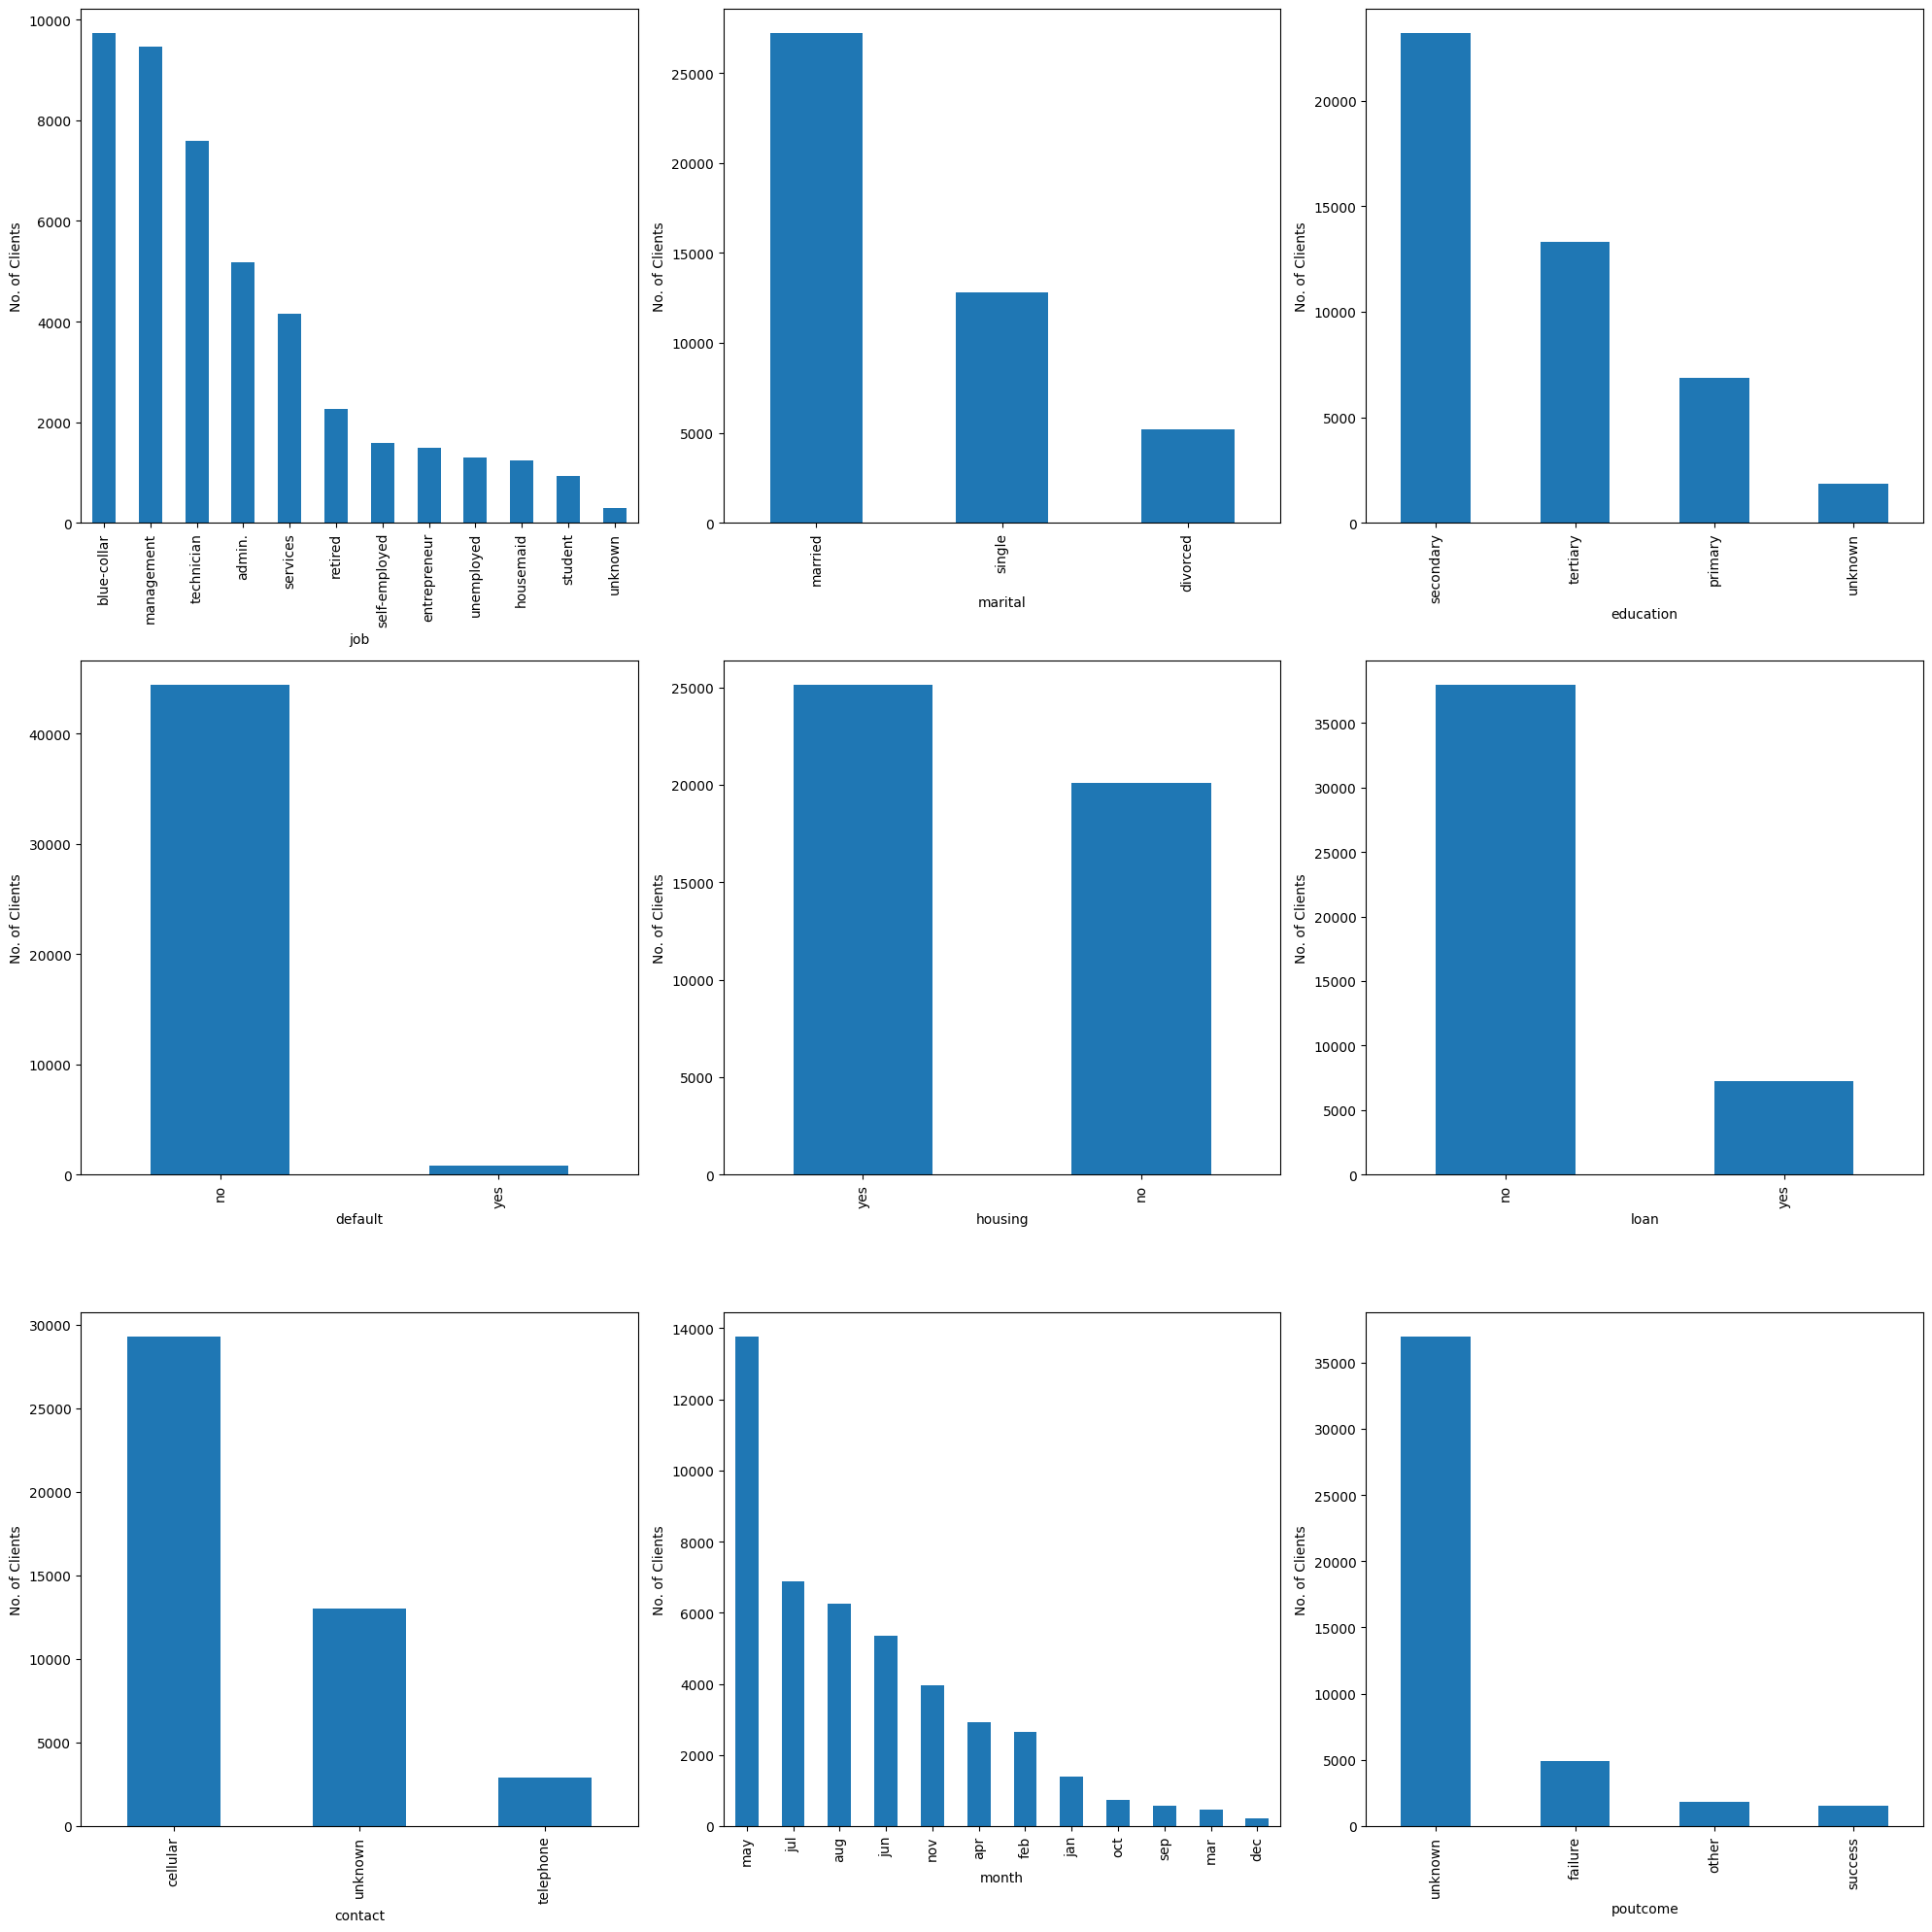

In [53]:
# Display bar chart of categorical columns

plt.figure(figsize = (20, 20))
plotnumber = 1

for column in categorical_data:
    x = df[column]
    ax = plt.subplot(3,3,plotnumber)   
    ax = df[column].value_counts().plot(kind='bar')
    ax.set_xlabel(column)
    ax.set_ylabel("No. of Clients")
    plotnumber += 1

plt.tight_layout()
plt.show()

Observation: In terms of count, the following are the top values for each category:
- job: blue-collar, management
- marital: married
- education: secondary
- default: no
- housing: yes
- loan: no
- contact: cellular
- month: may
- poutcome: unknown 


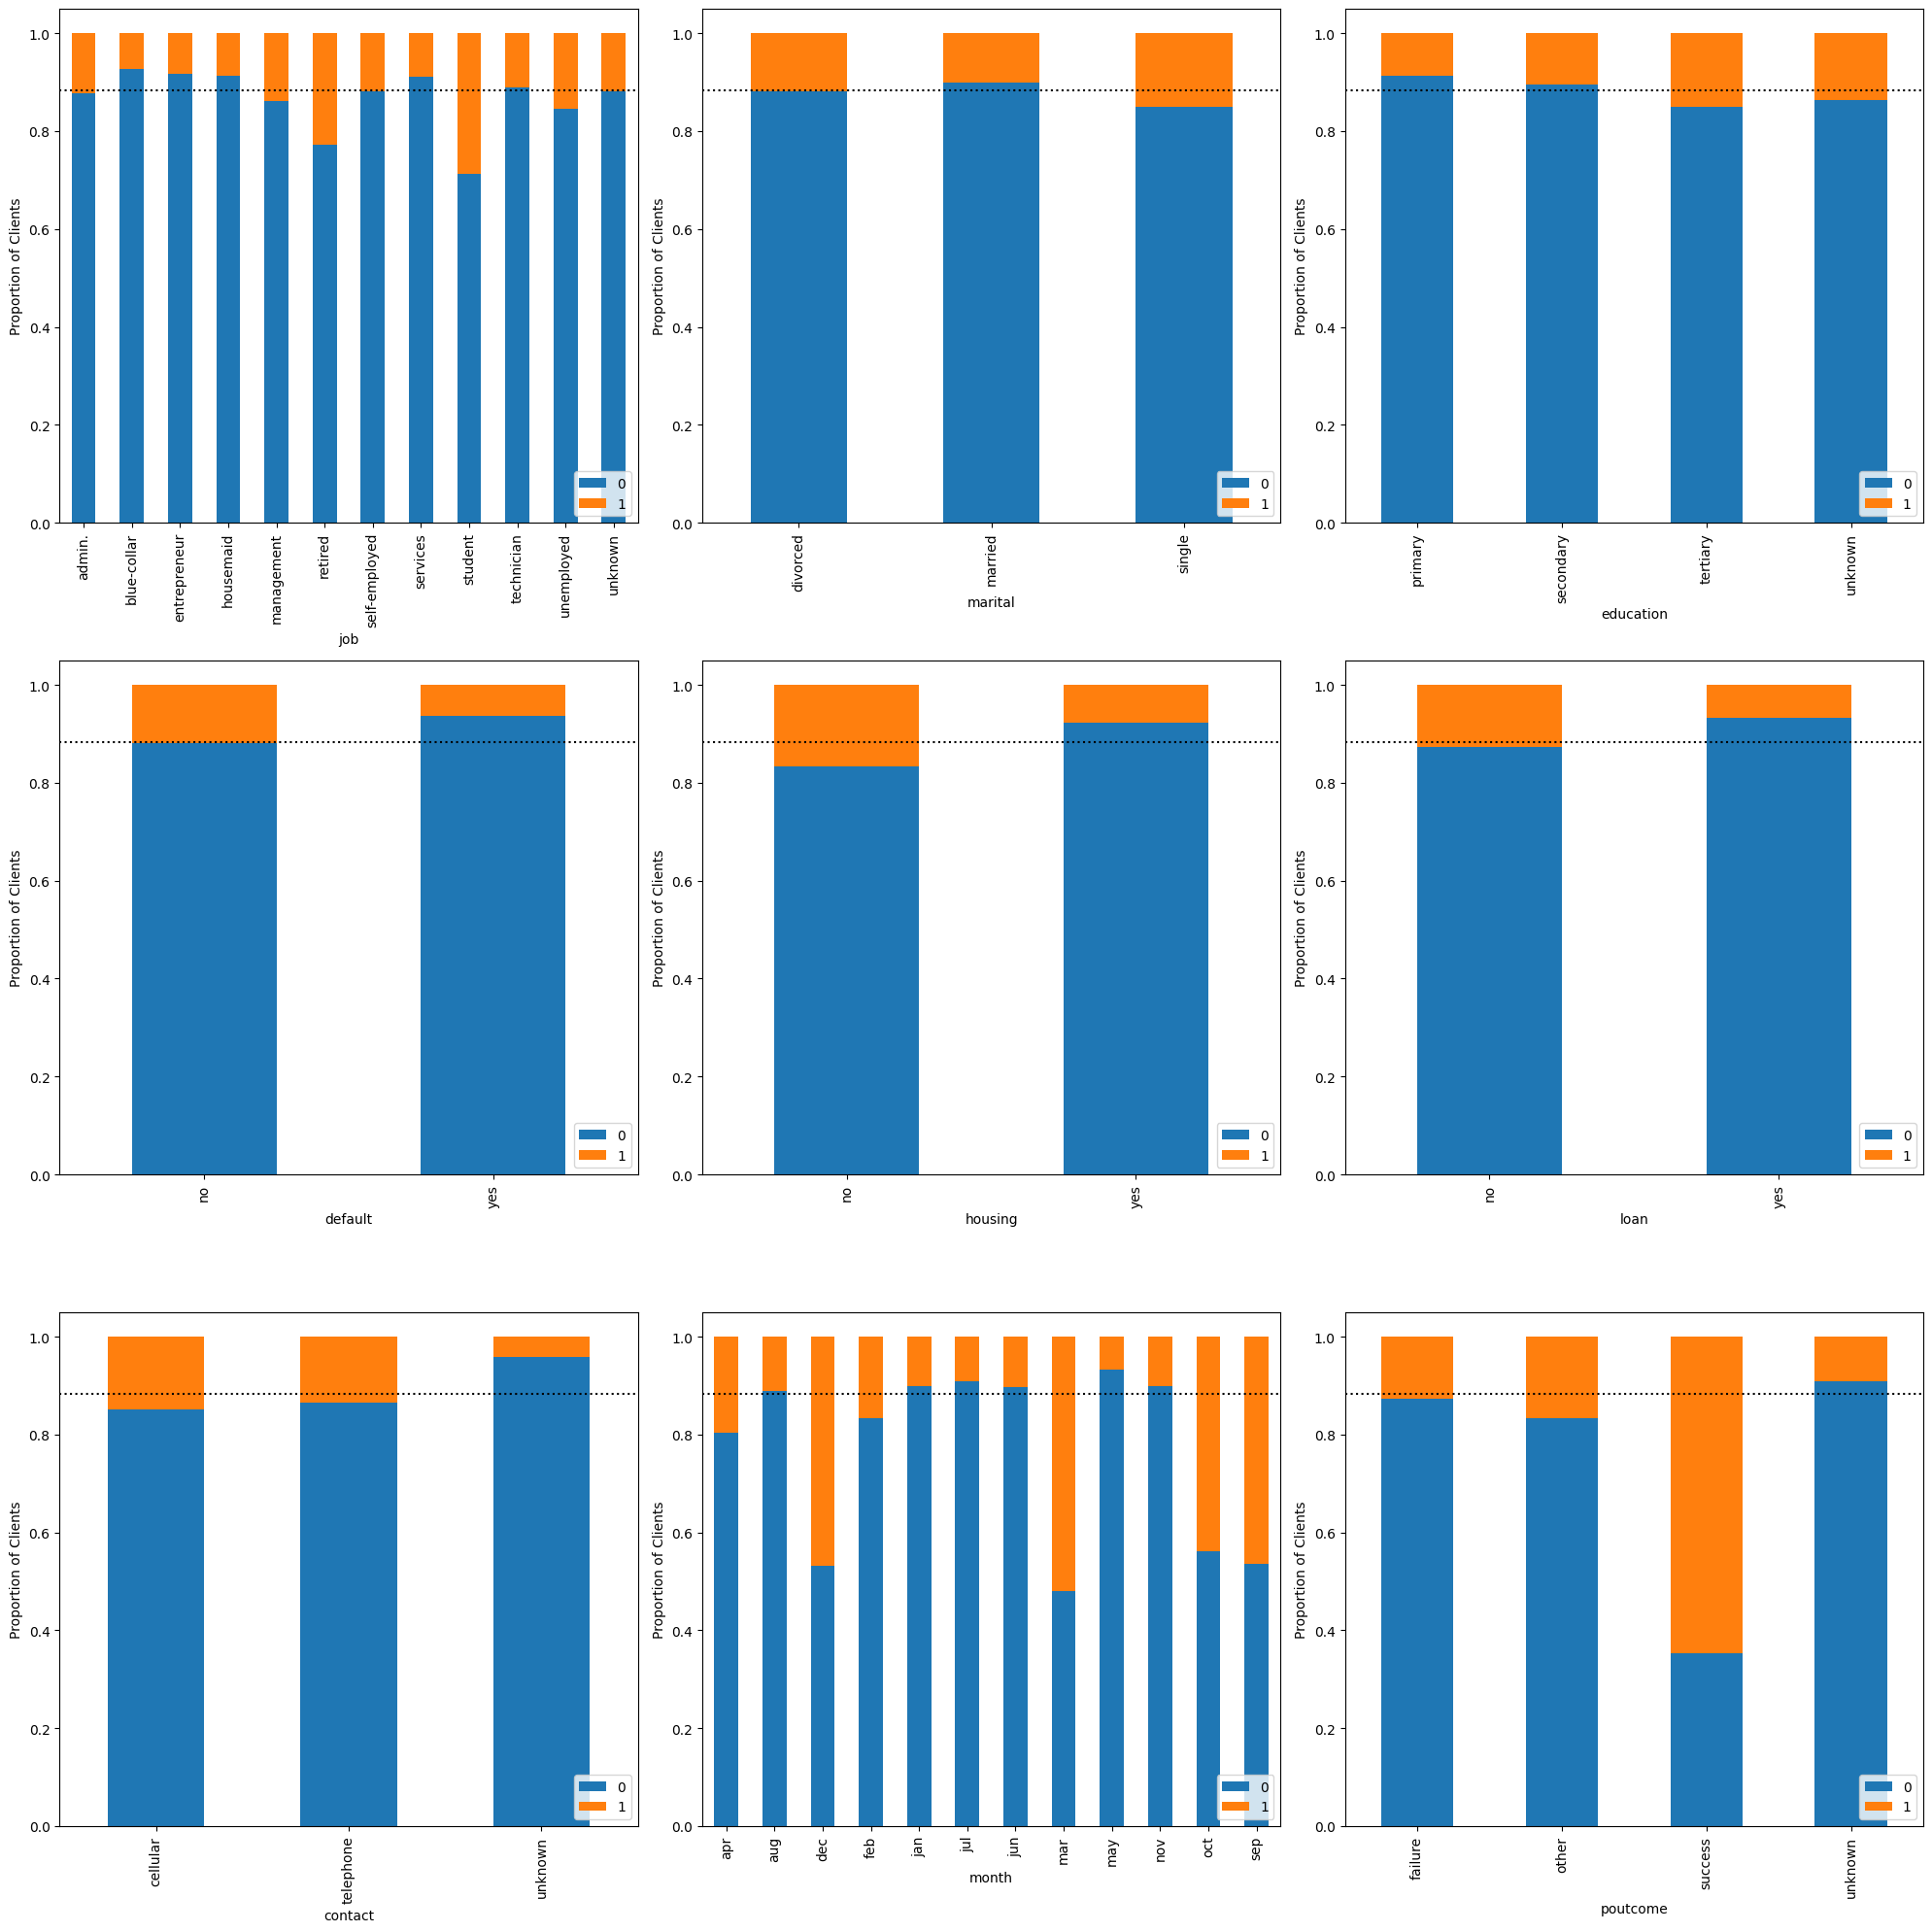

In [54]:
# Display stacked bar chart of categorical columns

plt.figure(figsize = (20, 20))
plotnumber = 1

for column in categorical_data:
    x = df[column]
    ax = plt.subplot(3,3,plotnumber)   
    table=pd.crosstab(df[column],df['subscribed'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',ax=ax, stacked=True).legend(loc='lower right')
    plt.ylabel('Proportion of Clients')
    plt.axhline(0.883015, color='black', ls='dotted')  # Baseline: Overall subscription rate
    plotnumber += 1

plt.tight_layout()
plt.show()

Observation: The following are the segments where subscription to term deposit is more prevalent i.e., higher than the 11.7% overall subscription rate.
- job: management, retired, student, unemployed
- marital: single
- education: tertiary
- default: no
- housing: no
- loan: no
- contact: cellular, telephone
- month: feb, mar, apr, oct, sep, dec
- poutcome: success

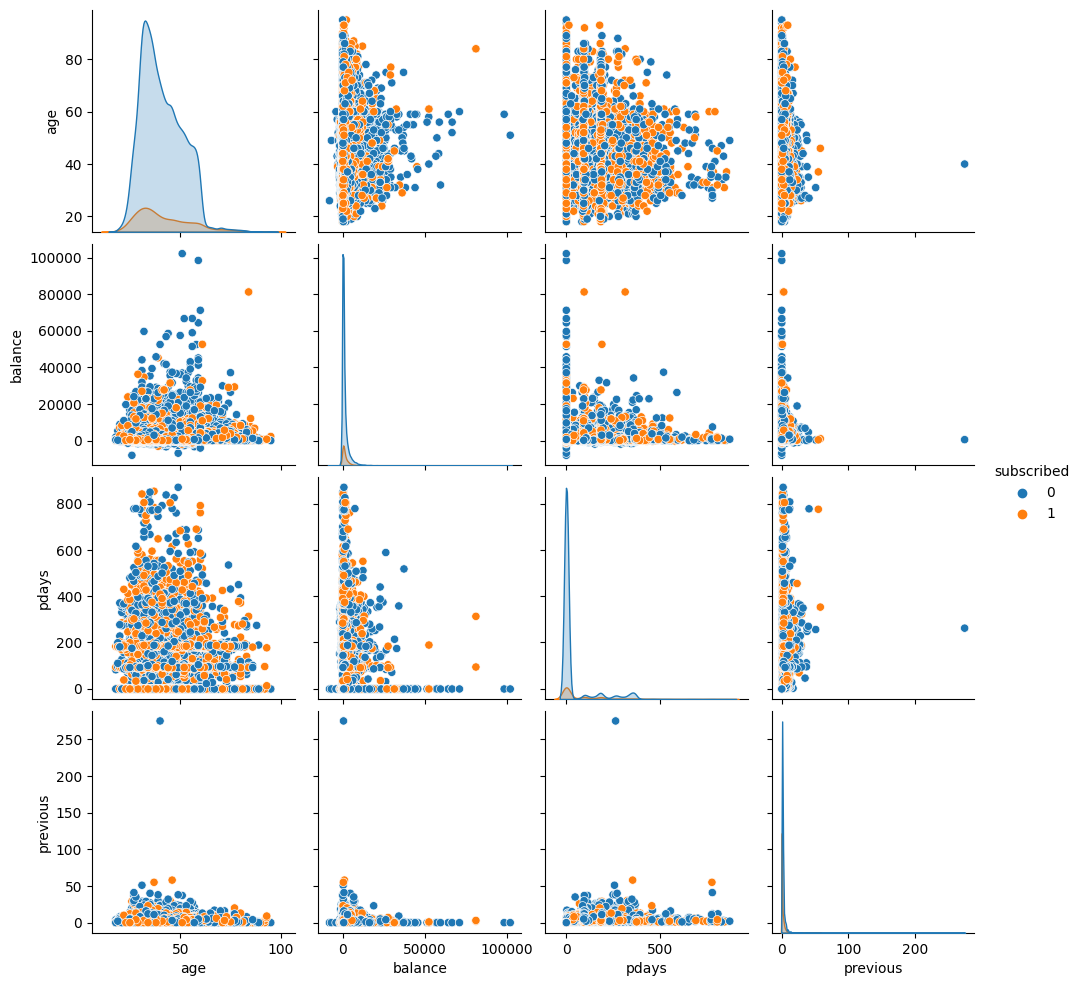

In [15]:
# Plot pairwise bivariate distributions for numerical data and target variable
sns.pairplot(df.select_dtypes(include=np.number),hue='subscribed')

Observation: There is no pair-wise combination of categories that show distinct separability betweent clients who subscribed (1) and did not subscribe (0) to term deposti.

----
### <b>Feature Engineering</b>
Creating new features, handling categorical variables, and transforming data to improve model performance.

In [55]:
# Create a new dataframe for the final data to be used in data modeling
model_data = df.copy()
model_data

,age,job,marital,education,default,balance,housing,loan,contact,month,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,may,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,may,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,nov,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,nov,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,nov,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,nov,-1,0,unknown,0


In [56]:
# Encode categorical data to numeric using a combination of one-hot encoding and manual grouping based on EDA results (segments where subscription is more prevalent)

# - job: management, retired, student, unemployed
# model_data['job_mgmt_retired_student_unemp'] = model_data['job'].apply(lambda value: 1 if value.lower() in ['management','retired', 'student', 'unemployed'] else 0)
model_data['job_retired_student'] = model_data['job'].apply(lambda value: 1 if value.lower() in ['retired', 'student'] else 0)
# model_data['job_management'] = model_data['job'].apply(lambda value: 1 if value.lower() in ['management'] else 0)
# model_data['job_retired'] = model_data['job'].apply(lambda value: 1 if value.lower() in ['retired'] else 0)
# model_data['job_student'] = model_data['job'].apply(lambda value: 1 if value.lower() in ['student'] else 0)
# model_data['job_unemployed'] = model_data['job'].apply(lambda value: 1 if value.lower() in ['unemployed'] else 0)

# - marital: single
model_data['marital_single'] = model_data['marital'].apply(lambda value: 1 if value.lower() == 'single' else 0)
# model_data['marital_married'] = model_data['marital'].apply(lambda value: 1 if value.lower() == 'married' else 0)

# - education: tertiary
# model_data['education_tertiary'] = model_data['education'].apply(lambda value: 1 if value.lower() == 'tertiary' else 0)
model_data['education_primary_secondary'] = model_data['education'].apply(lambda value: 1 if value.lower() in ['primary','secondary'] else 0)

# - default: no
model_data['default_yes'] = model_data['default'].apply(lambda value: 1 if value.lower() == 'yes' else 0)

# - housing: no
model_data['housing_yes'] = model_data['housing'].apply(lambda value: 1 if value.lower() == 'yes' else 0)

# - loan: no
model_data['loan_yes'] = model_data['loan'].apply(lambda value: 1 if value.lower() == 'yes' else 0)

# - contact: cellular, telephone
model_data['contact_cellular_telephone'] = model_data['contact'].apply(lambda value: 1 if value.lower() in ['cellular','telephone'] else 0)

# - month: feb, mar, apr, oct, sep, dec
model_data['month_feb_mar_apr_sep_oct_dec'] = model_data['month'].apply(lambda value: 1 if value.lower() in ['feb', 'mar', 'apr', 'oct', 'sep', 'dec'] else 0)
# model_data['month_mar_sep_oct_dec'] = model_data['month'].apply(lambda value: 1 if value.lower() in ['mar', 'sep', 'oct', 'dec'] else 0)

# - poutcome: success
model_data['poutcome_success'] = model_data['poutcome'].apply(lambda value: 1 if value.lower() == 'success' else 0)

model_data = model_data.drop(['job','marital','education','default','housing','loan','contact','month'
                              ,'poutcome'
                              ], axis=1)

model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            45211 non-null  int64
 1   balance                        45211 non-null  int64
 2   pdays                          45211 non-null  int64
 3   previous                       45211 non-null  int64
 4   subscribed                     45211 non-null  int64
 5   job_retired_student            45211 non-null  int64
 6   marital_single                 45211 non-null  int64
 7   education_primary_secondary    45211 non-null  int64
 8   default_yes                    45211 non-null  int64
 9   housing_yes                    45211 non-null  int64
 10  loan_yes                       45211 non-null  int64
 11  contact_cellular_telephone     45211 non-null  int64
 12  month_feb_mar_apr_sep_oct_dec  45211 non-null  int64
 13  poutcome_success

Observation: After encoding, all features are now numerical.

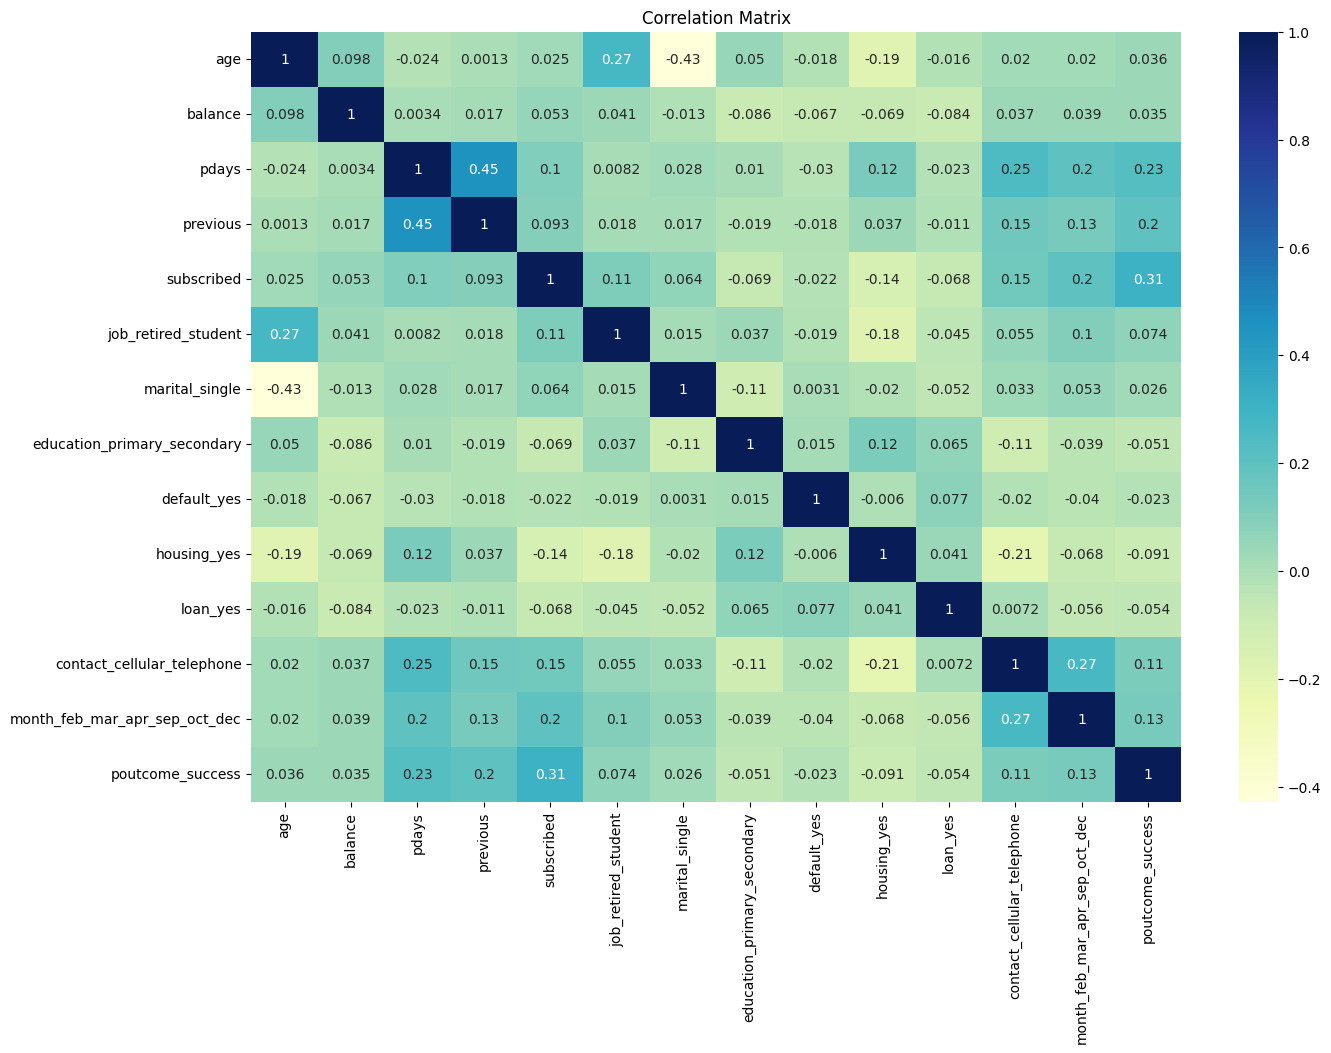

In [57]:
# Correlation Heat Map: Pairwise correlation

plt.figure(figsize=(15,10))
sns.heatmap(model_data.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

Observation: previous (number of contacts performed before this campaign) and pdays (number of days that passed by after the client was last contacted from a previous campaign) have higher correlation with each other compared to other features. None of the features show high correlation with the target variable (subscribed).

In [58]:
# Variance Inflation Factor

def VIF(independent_variable):
    vif = pd.DataFrame()
    vif['feature'] = independent_variable.columns
    vif['vif_factor'] = [variance_inflation_factor(independent_variable.values,i) for i in range(independent_variable.shape[1])]
    return vif.sort_values('vif_factor')

VIF(model_data.drop(['subscribed'], axis=1))

,feature,vif_factor
7,default_yes,1.029184
12,poutcome_success,1.134268
4,job_retired_student,1.184364
9,loan_yes,1.214831
1,balance,1.235443
5,marital_single,1.327673
11,month_feb_mar_apr_sep_oct_dec,1.349132
3,previous,1.361796
2,pdays,1.631581
8,housing_yes,2.252645


Observation: There is no VIF greater than 10 which means that none of the features is significantly correlated with another feature.

----
### <B>Data Modeling: Model Selection, Hyperparameter Tuning</b>
Data modeling using Decision Trees and ANN. Optimizing model performance using GridSearchCV to find the best hyperparameters.

In [60]:
# Split the target and features
y_var = model_data['subscribed']
x_vars = model_data.drop(['subscribed'], axis=1)

print('y data:',y_var.shape)
print('x data:',x_vars.shape)

y data: (45211,)
x data: (45211, 13)


In [61]:
# Split the data into training (80%) and test (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x_vars,y_var,test_size=0.2,random_state=1234)

print('X Train:',x_train.shape)
print('Y Train:',y_train.shape)
print('X Test:',x_test.shape)
print('Y Test:',y_test.shape)

X Train: (36168, 13)
Y Train: (36168,)
X Test: (9043, 13)
Y Test: (9043,)


In [62]:
# Function to check for outliers and cap values of outliers
def CheckOutliers(inData,inNumericalFeatures):
    
    # Initialize blank dataframes and dictionary
    outTrain = pd.DataFrame()
    outlier_limits = {}
    
    # Loop through all numerical features
    for colName in inData.columns:
        
        if colName in inNumericalFeatures:
            
            # Compute for lower/upper limits using the training data
            quartile_75, quartile_q25 = np.percentile(inData.loc[:,colName],[75,25])    # 75th and 25th percentiles
            interquartile_range = quartile_75 - quartile_q25                            # Interquartile range (IQR)
            min_val = quartile_q25 - ( 1.5 * interquartile_range )                      # Lower limit
            max_val = quartile_75 + ( 1.5 * interquartile_range )                       # Upper limit
                        
            # Add to dictionary
            if min_val != max_val:
                outlier_limits[colName] = [min_val,max_val]
                
    return outlier_limits

# Get outlier limits based on training data
outlier_limits = CheckOutliers(x_train,[col for col in numerical_data if col not in ['pdays']])
outlier_limits

{'age': [10.5, 70.5], 'balance': [-1965.0, 3467.0]}

Observation: There are outliers in age and balance. To address outliers, values for these features will be capped based on the lower and upper limits. 

In [63]:
# Function to check for outliers and cap values of outliers
def RemoveOutliers(inData,inOutliers):
    
    # Initialize blank dataframes
    # outData = pd.DataFrame()
    outData = inData
    
    # Loop through all features
    for colName in inData.columns:
        
        if colName in list(inOutliers.keys()):
            
            min_val = inOutliers.get(colName)[0]  # Lower limit
            max_val = inOutliers.get(colName)[1]  # Upper limit
            
            # If the value is lower/greater than the min/max limits, it is an outlier
            outliers = inData[(inData[colName] < min_val) | (inData[colName] > max_val)]
            
            # For outliers, apply capping -- replace the value with either the lower or upper limit
            outData[colName] = np.where( inData[colName] > max_val, max_val, np.where( inData[colName] < min_val, min_val, inData[colName] ) )
            
            # Summary per feature
            print(f'No. of outliers for {colName}: {outliers.shape[0]} \t\tLimits: {round(min_val,4)} , {round(max_val,4)}')
            
        else:
            outData[colName] = inData[colName].values
    
    return outData

# Check and handle outliers of the data. For the test set, the lower/upper limits will be the same as the training set.
print('\nRemove outliers - Train Set')
x_train_no_outliers = RemoveOutliers(x_train,outlier_limits)

print('\nRemove outliers - Test Set')
x_test_no_outliers = RemoveOutliers(x_test,outlier_limits)


Remove outliers - Train Set
No. of outliers for age: 376 		Limits: 10.5 , 70.5
No. of outliers for balance: 3770 		Limits: -1965.0 , 3467.0

Remove outliers - Test Set
No. of outliers for age: 111 		Limits: 10.5 , 70.5
No. of outliers for balance: 943 		Limits: -1965.0 , 3467.0


Observation: There are outliers in the data. It's higher in "balance" where 3,770 out of 36,168 (10%) of the values in the training set are outliers.

In [64]:
# Scale the data
scaler = StandardScaler()

x_train_sc = scaler.fit_transform(x_train_no_outliers)
x_test_sc = scaler.transform(x_test_no_outliers)

In [65]:
# Oversampling to handle class imbalance
oversample = SMOTE(random_state=42)
# oversample = SMOTE(random_state=42,sampling_strategy={1: int(y_train.value_counts()[0]/2)})  # Ratio 1:2

# Perform oversampling using SMOTE
x_oversample,y_oversample = oversample.fit_resample(x_train_sc, y_train)

# Class distribution before performing SMOTE
print('\nBefore Oversampling:')
print('No. of Observations:',len(x_train_sc))
print(y_train.value_counts() / len(y_train))

# Class distribution after performing SMOTE
print('\nAfter Oversampling:')
print('No. of Observations:',len(x_oversample))
print(y_oversample.value_counts() / len(y_oversample))


Before Oversampling:
No. of Observations: 36168
0    0.882714
1    0.117286
Name: subscribed, dtype: float64

After Oversampling:
No. of Observations: 63852
0    0.5
1    0.5
Name: subscribed, dtype: float64


Observation: After performing SMOTE (Synthetic Minority Oversampling Technique), the distribution of classes became 50-50.

### <b>Data Modeling Using Decision Tree</b>

In [66]:
# Decision Tree hyperparameter tuning
# dtree_params = [{'min_samples_leaf': [100,200,500], 'max_depth': list(range(1,20))}]
dtree_params = [{'min_samples_leaf': [300,500], 'max_depth': list(range(1,30))}]
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state = 42), dtree_params, verbose=1, cv=10, scoring='accuracy')
grid_search_cv.fit(x_oversample, y_oversample)

# Best hyperparameters for Decision Tree
print('Score:',grid_search_cv.best_score_)
dtree_best_params = grid_search_cv.best_estimator_
grid_search_cv.best_estimator_

Fitting 10 folds for each of 58 candidates, totalling 580 fits
Score: 0.7197587812611819


DecisionTreeClassifier(max_depth=18, min_samples_leaf=300, random_state=42)

Observation: Based on the result of GridSearchCV, the best hyperparameters are max_depth=18 and min_samples_leaf=300.

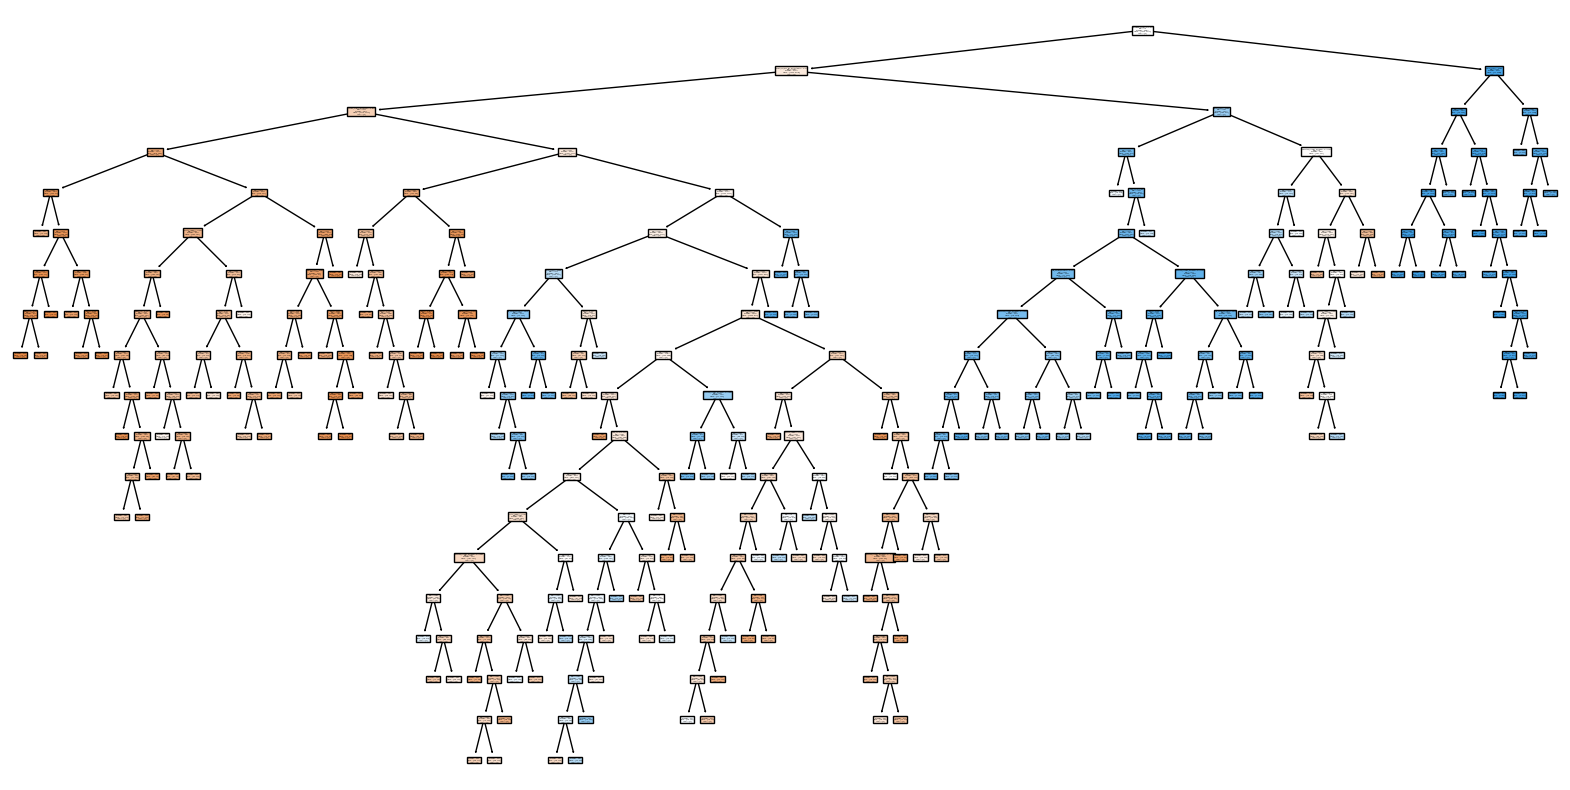

In [67]:
# Training using the best hyperparameters for Decision Tree
model_dtree = dtree_best_params
# model_dtree = DecisionTreeClassifier(min_samples_leaf=50, random_state=42)
model_dtree.fit(x_oversample, y_oversample)

# Plot decision tree
fig = plt.figure(figsize = (20, 10))
tree.plot_tree(model_dtree, feature_names = list(x_train.columns), class_names = True, filled = True)
plt.show()

In [68]:
# Predict values using the Decision Tree model
y_pred_train_dtree = model_dtree.predict(x_oversample)
y_pred_test_dtree = model_dtree.predict(x_test_sc)

In [69]:
# Function to evaluate the model
def ModelEval(yActual,yPred):

    # Create a summary of model scores
    model_score_list = ['classification accuracy','precision','recall','f1 score',
                        # 'ROC AUC'
                        ]
    model_score = pd.DataFrame(pd.Series(model_score_list))
    model_score.set_index(0, inplace=True)

    # Accuracy
    rowIndex = model_score.index[0]
    model_score.loc[rowIndex, '1 - Yes'] = np.nan
    model_score.loc[rowIndex, '0 - No'] = np.nan
    model_score.loc[rowIndex, 'weighted ave'] = accuracy_score(yActual, yPred).round(2)
    model_score

    # Precision
    rowIndex = model_score.index[1] 
    model_score.loc[rowIndex, '1 - Yes'] = precision_score(yActual,yPred, pos_label=1).round(2)
    model_score.loc[rowIndex, '0 - No'] = precision_score(yActual,yPred, pos_label=0).round(2)
    model_score.loc[rowIndex, 'weighted ave'] = precision_score(yActual,yPred, average='weighted').round(2)

    # Recall
    rowIndex = model_score.index[2]
    model_score.loc[rowIndex, '1 - Yes'] = recall_score(yActual,yPred, pos_label=1).round(2)
    model_score.loc[rowIndex, '0 - No'] = recall_score(yActual,yPred, pos_label=0).round(2)
    model_score.loc[rowIndex, 'weighted ave'] = recall_score(yActual,yPred, average='weighted').round(2)

    # F1 Score
    rowIndex = model_score.index[3]
    model_score.loc[rowIndex, '1 - Yes'] = f1_score(yActual,yPred, pos_label=1).round(2)
    model_score.loc[rowIndex, '0 - No'] = f1_score(yActual,yPred, pos_label=0).round(2)
    model_score.loc[rowIndex, 'weighted ave'] = f1_score(yActual,yPred, average='weighted').round(2)
    
    return model_score

# Evaluate the model using the train set
print('Decision Tree - TRAIN')
print(ModelEval(y_oversample,y_pred_train_dtree))

# Evaluate the model using the test set
print('\n\nDecision Tree - TEST')
print(ModelEval(y_test,y_pred_test_dtree))

Decision Tree - TRAIN
                         1 - Yes  0 - No  weighted ave
0                                                     
classification accuracy      NaN     NaN          0.73
precision                   0.76    0.70          0.73
recall                      0.67    0.78          0.73
f1 score                    0.71    0.74          0.73


Decision Tree - TEST
                         1 - Yes  0 - No  weighted ave
0                                                     
classification accuracy      NaN     NaN          0.75
precision                   0.25    0.93          0.85
recall                      0.57    0.78          0.75
f1 score                    0.35    0.85          0.79


Observation: Accuracy for Train (73%) and Test (75%) are almost same, therefore, overfitting/underfitting is not an issue. Recall is 75% and precision is 85%.

                          Feature  Feature Importance
0                             age            0.138555
1                         balance            0.100254
2                           pdays            0.039978
3                        previous            0.007258
4             job_retired_student            0.004023
5                  marital_single            0.006614
6     education_primary_secondary            0.013816
8                     housing_yes            0.082231
9                        loan_yes            0.008120
10     contact_cellular_telephone            0.098339
11  month_feb_mar_apr_sep_oct_dec            0.202326
12               poutcome_success            0.298484


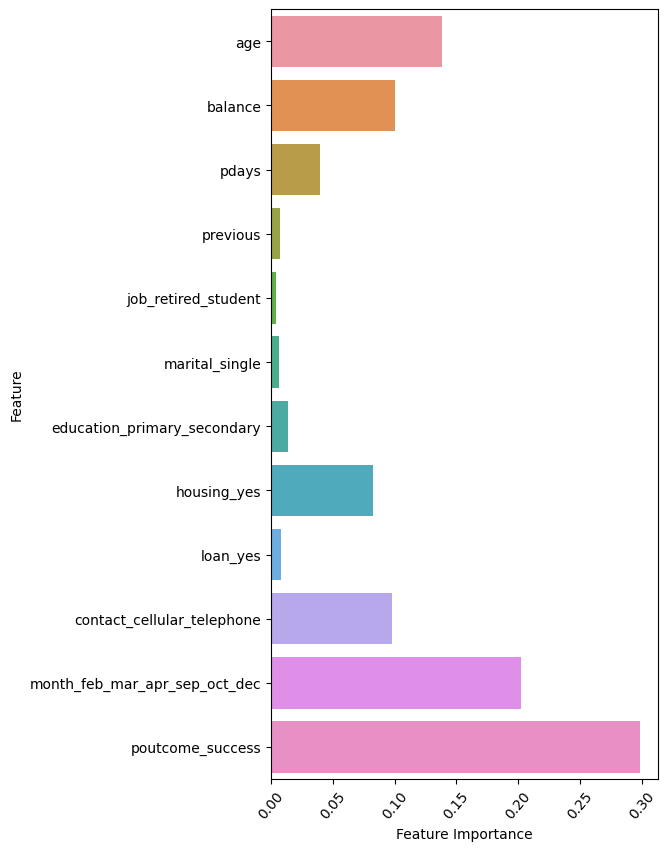

In [72]:
# Summary of Decision Tree Features 
summary_dtree = pd.DataFrame()
summary_dtree['Feature'] = x_train.columns
summary_dtree['Feature Importance'] = model_dtree.feature_importances_
summary_dtree = summary_dtree[summary_dtree['Feature Importance']>0]
print(summary_dtree)

# Plot feature importance
fig = plt.figure(figsize = (5, 10))
sns.barplot(x=summary_dtree['Feature Importance'], y=summary_dtree['Feature'])
plt.xticks(rotation = 50)
plt.show()

Observation: The most important feature in the decision tree is poutcome_success (if the outcome of the previous marketing campaign is success). This is followed by month (last contact month of year), age, and balance (average yearly balance).

### <b>Data Modeling Using ANN</b>

In [73]:
# Split the data intro training and validation sets
x_train_ann, x_valid_ann, y_train_ann, y_valid_ann = train_test_split(x_oversample,y_oversample,test_size=0.2,random_state=1234)

print('X Train - ANN:',x_train_ann.shape)
print('Y Train - ANN:',y_train_ann.shape)
print('X Valid - ANN:',x_valid_ann.shape)
print('Y Valid - ANN:',y_valid_ann.shape)

X Train - ANN: (51081, 13)
Y Train - ANN: (51081,)
X Valid - ANN: (12771, 13)
Y Valid - ANN: (12771,)


In [94]:
# Set up the layers of ANN
ann_layers = [tf.keras.layers.Dense(units=x_train_ann.shape[1:][0], input_shape=x_train_ann.shape[1:], name="inputLayer"),
              tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
              tf.keras.layers.Dense(200, activation="relu", name="hiddenLayer2"),
              tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer3"),              
              tf.keras.layers.Dense(50, activation="relu", name="hiddenLayer4"),
              tf.keras.layers.Dense(1, activation="sigmoid", name="outputLayer")]

model_ann = tf.keras.models.Sequential(ann_layers)

print('Layers:\n')
print(model_ann.layers)
print('\n\nSummary:\n')
print(model_ann.summary())

Layers:

[<keras.src.layers.core.dense.Dense object at 0x00000291F93E06A0>, <keras.src.layers.core.dense.Dense object at 0x00000291F94B5450>, <keras.src.layers.core.dense.Dense object at 0x00000291F94B6560>, <keras.src.layers.core.dense.Dense object at 0x00000291F94B6D70>, <keras.src.layers.core.dense.Dense object at 0x00000291F94B6080>, <keras.src.layers.core.dense.Dense object at 0x00000291F94B6410>]


Summary:

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Dense)          (None, 13)                182       
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               4200      
                                                                 
 hiddenLayer2 (Dense)        (None, 200)               60200     
                                                                 
 hiddenLayer3 (Dense)        (No

Epoch 1/10


1597/1597 [==============================] - 4s 2ms/step - loss: 0.6021 - accuracy: 0.6782 - val_loss: 0.5705 - val_accuracy: 0.6954
Epoch 2/10
1597/1597 [==============================] - 3s 2ms/step - loss: 0.5720 - accuracy: 0.6990 - val_loss: 0.5663 - val_accuracy: 0.7044
Epoch 3/10
1597/1597 [==============================] - 3s 2ms/step - loss: 0.5682 - accuracy: 0.7028 - val_loss: 0.5640 - val_accuracy: 0.7055
Epoch 4/10
1597/1597 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7041 - val_loss: 0.5626 - val_accuracy: 0.7051
Epoch 5/10
1597/1597 [==============================] - 3s 2ms/step - loss: 0.5635 - accuracy: 0.7049 - val_loss: 0.5597 - val_accuracy: 0.7093
Epoch 6/10
1597/1597 [==============================] - 3s 2ms/step - loss: 0.5612 - accuracy: 0.7072 - val_loss: 0.5597 - val_accuracy: 0.7075
Epoch 7/10
1597/1597 [==============================] - 3s 2ms/step - loss: 0.5591 - accuracy: 0.7100 - val_loss: 0.5562 - val_accuracy: 0.7094
Epo

<AxesSubplot: >

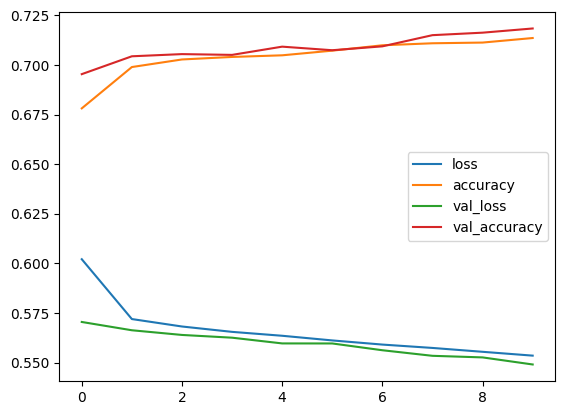

In [95]:
# Compile the ANN model
model_ann.compile(loss="binary_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"])

# Training
history = model_ann.fit(x_train_ann, y_train_ann, epochs=10,
                        validation_data=(x_valid_ann, y_valid_ann),
                        batch_size=32)

# Plot
pd.DataFrame(history.history).plot()

In [96]:
# Class probabilities using ANN
y_prob_train_ann = model_ann.predict(x_oversample, verbose=0)
y_prob_test_ann = model_ann.predict(x_test_sc, verbose=0)

# Predict classes using ANN
y_pred_train_ann = [int(round(x[0])) for x in y_prob_train_ann]
y_pred_test_ann = [int(round(x[0])) for x in y_prob_test_ann]

# Evaluate the model using test data
test_loss, test_acc = model_ann.evaluate(x_test_sc, y_test, verbose=2)

print('\nTest Accuracy:', test_acc)
print('Test Loss:', test_loss)

283/283 - 0s - loss: 0.5690 - accuracy: 0.7601 - 309ms/epoch - 1ms/step

Test Accuracy: 0.7601459622383118
Test Loss: 0.5689975619316101


In [98]:
# Evaluate the model using the train set
print('ANN - TRAIN')
print(ModelEval(y_oversample,y_pred_train_ann))

# Evaluate the model using the test set
print('\nANN - TEST')
print(ModelEval(y_test,y_pred_test_ann))

ANN - TRAIN
                         1 - Yes  0 - No  weighted ave
0                                                     
classification accuracy      NaN     NaN          0.72
precision                   0.75    0.69          0.72
recall                      0.66    0.78          0.72
f1 score                    0.70    0.73          0.72

ANN - TEST
                         1 - Yes  0 - No  weighted ave
0                                                     
classification accuracy      NaN     NaN          0.76
precision                   0.27    0.94          0.86
recall                      0.62    0.78          0.76
f1 score                    0.37    0.85          0.80


Observation: Accuracy for Train (72%) and Test (76%) are not far from each other. Recall is 86% and precision is 76%.

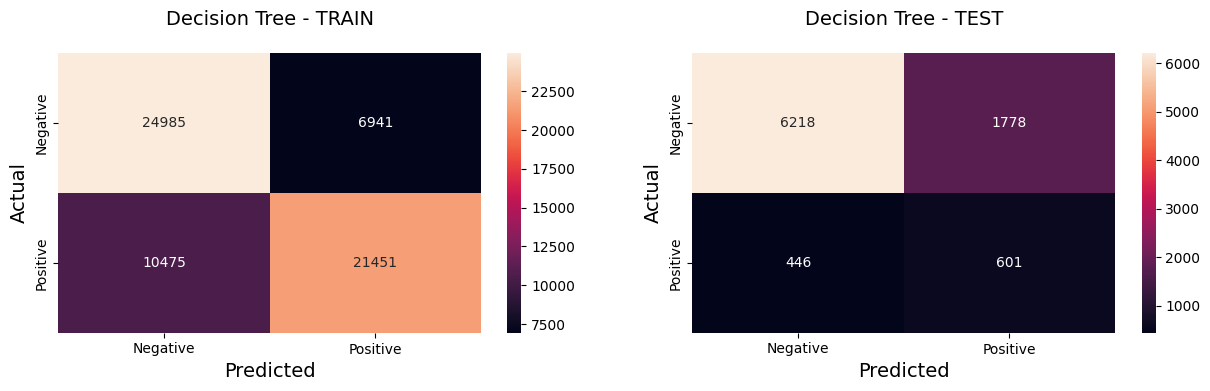

In [99]:
# Function to create confusion matrices
def ConfusionMatrix(inAlgo,yActualTrain,yPredTrain,yActualTest,yPredTest):

    # Order of the input parameters is important: 
    conf_matrix_train = confusion_matrix(yActualTrain, yPredTrain)
    conf_matrix_test = confusion_matrix(yActualTest, yPredTest)

    plt.figure(figsize=(15,8))

    # Plot Confusion Matrix TRAIN
    ax = plt.subplot(2, 2, 1)
    ax = sns.heatmap(conf_matrix_train, annot=True, fmt='d')
    # set x-axis label and ticks. 
    ax.set_xlabel("Predicted", fontsize=14)
    ax.xaxis.set_ticklabels(['Negative', 'Positive'])
    # set y-axis label and ticks
    ax.set_ylabel("Actual", fontsize=14)
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])
    # set plot title
    ax.set_title(f"{inAlgo} - TRAIN", fontsize=14, pad=20)

    # Plot Confusion Matrix TEST
    ax = plt.subplot(2, 2, 2)
    ax = sns.heatmap(conf_matrix_test, annot=True, fmt='d')
    # set x-axis label and ticks. 
    ax.set_xlabel("Predicted", fontsize=14)
    ax.xaxis.set_ticklabels(['Negative', 'Positive'])
    # set y-axis label and ticks
    ax.set_ylabel("Actual", fontsize=14)
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])
    # set plot title
    ax.set_title(f"{inAlgo} - TEST", fontsize=14, pad=20)
    plt.show()

# Decision Tree Confusion Matrix
ConfusionMatrix('Decision Tree',y_oversample,y_pred_train_dtree,y_test,y_pred_test_dtree)

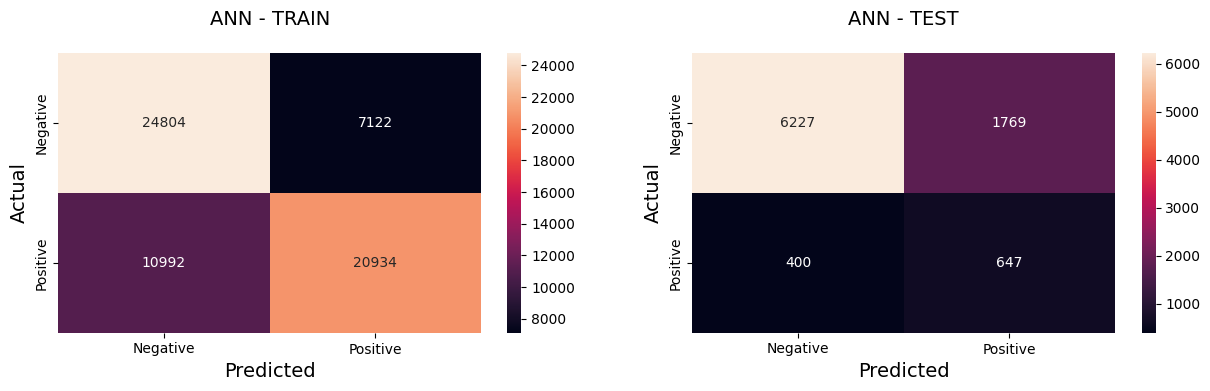

In [100]:
# ANN Confusion Matrix
ConfusionMatrix('ANN',y_oversample,y_pred_train_ann,y_test,y_pred_test_ann)

<b>Final Model:</b>
<br>The decision tree and ANN models have almost similar performance. However, the decision tree is simpler and more interpretable, hence, is selected as the final model.

----
### <b>Pickle Files</b>
Saving the trained models and other files using the pickle library so they can be easily loaded for deployment.

In [532]:
# Create pickle files
pickle.dump(outlier_limits,open(parent_directory + "\\models\\outlier_limits.pkl",'wb'))
pickle.dump(scaler,open(parent_directory + "\\models\\scaler.pkl",'wb'))
pickle.dump(model_dtree,open(parent_directory + "\\models\\model_dtree.pkl",'wb'))
pickle.dump(model_ann,open(parent_directory + "\\models\\model_ann.pkl",'wb'))

# Get pickle files
# outlier_limits = pickle.load(open(parent_directory + "\\models\\outlier_limits.pkl",'rb'))
# scaler = pickle.load(open(parent_directory + "\\models\\scaler.pkl",'rb'))
# model_dtree = pickle.load(open(parent_directory + "\\models\\model_dtree.pkl",'rb'))
# model_ann = pickle.load(open(parent_directory + "\\models\\model_ann.pkl",'rb'))